In [1]:
# Import necessary libraries
#!pip install seaborn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   # plotting
import seaborn as sns   # plotting heatmap

import statsmodels.api as sm
import json
import math
import datetime

from yahoofinancials import YahooFinancials

from bs4 import BeautifulSoup

%matplotlib inline

In [6]:

tickers = ["QQQ"] 

start_date = "2020-4-30" #"2013-11-20" # "2018-6-15" #"2016-10-15"

end_date = str(datetime.date.today()) # "2019-3-30"# 

update = True

if update:
	stocks = YahooFinancials(tickers)
	historical_price = stocks.get_historical_price_data(start_date, end_date, "daily")

	with open('data/data_mret.py', 'w') as outfile:
	
		outfile.write("historical_price=")

		json.dump(historical_price, outfile)

else:
	from data.data_mret import historical_price

	historical_price = historical_price
    
chart_data = {}
other_tickers = {}
longest = 0
longest_ticker = "ICE"


for ticker in tickers:
	# for all data before sorting
	# print ticker
	chart_data[ticker] = historical_price[ticker]["prices"]

	other_tickers[ticker] = len(historical_price[ticker]["prices"])

	if len(historical_price[ticker]["prices"]) > longest:

		longest = len(historical_price[ticker]["prices"])

		longest_ticker = ticker

save_data = {}
save_data["date"] = []
save_data["formatted_date"] = []

def load_ticker_data(ticker, chart_data):
    rf_list = list()
    for i in range(0, len(chart_data[ticker]) ):
        rf_list.append( [ pd.to_datetime(chart_data[ticker][i]["formatted_date"]), \
                    chart_data[ticker][i]["adjclose"], chart_data[ticker][i]["high"],\
                    chart_data[ticker][i]["low"], chart_data[ticker][i]["open"],
                    chart_data[ticker][i]["close"], chart_data[ticker][i]["volume"]  
                    ])
    df = pd.DataFrame(rf_list, columns=["date", "adjclose", "high","low", "open", "close", "volume"]) # , 
    df = df.set_index("date")
    return df

prices = pd.DataFrame()

for ticker in tickers:
    prices[ticker] = load_ticker_data(ticker, chart_data).adjclose

In [7]:
large_data = pd.DataFrame(chart_data["QQQ"])
large_data.describe()

,date,high,low,open,close,volume,adjclose
count,1.074000e+03,1074.000000,1074.000000,1074.000000,1074.000000,1.074000e+03,1074.000000
mean,1.655473e+09,343.835717,338.217421,341.135866,341.206099,5.066140e+07,336.821107
std,3.891964e+07,59.507593,59.620521,59.628101,59.536003,2.096569e+07,60.656859
min,1.588253e+09,215.449997,211.119995,211.460007,212.740005,1.549880e+07,207.385330
25%,1.621885e+09,296.542496,290.872498,293.659996,293.705009,3.587552e+07,289.086121
50%,1.655343e+09,337.080002,332.795013,334.774994,335.139999,4.717260e+07,328.902069
75%,1.689233e+09,378.592491,373.882507,376.477493,376.834991,6.065230e+07,372.193970
max,1.722951e+09,503.519989,498.390015,503.070007,502.959991,1.986858e+08,502.959991


In [8]:
df_test = large_data.drop(columns=["date"])

In [9]:
df=df_test.rename(columns={df_test.columns[6]: 'date'}).set_index("date")

In [14]:
# We want to keep original time series for the EDA in APPENDIX Exploratory data analysis
# So we apply the 'pc_change()' transformation to a copy of the original time series
df_transform = df.copy().pct_change(1)
df_transform.head()


,high,low,open,close,volume,adjclose
date,,,,,,
2020-04-30,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-01,-0.015315,-0.026087,-0.024778,-0.028185,0.125359,-0.028185
2020-05-04,-0.005631,-0.002645,-0.014172,0.011657,-0.326960,0.011657
2020-05-05,0.021768,0.027141,0.028280,0.011337,0.150486,0.011337
2020-05-06,0.004088,0.005810,0.009014,0.006156,-0.035145,0.006156


In [21]:
#add the target values in the files

In [16]:
df_transform = pd.read_csv("data/vix_data.csv").set_index("date")
df_transform.head()

,CLOSE,PC_Ratio,qqq_close,qqq_open,volume,target_value
date,,,,,,
11/1/2006,0.00,0.00,0.000000,42.730000,0,1
11/2/2006,11.51,0.91,42.000000,41.810001,148960600,1
11/3/2006,11.42,0.90,42.040001,42.099998,100216400,1
11/6/2006,11.16,0.91,41.930000,42.070000,119263300,1
11/7/2006,11.16,0.76,42.540001,42.540001,101283300,1


In [17]:
def sma(df, days=200):
    #print(df)
    l = [0]*days
    for i in range(0, len(df)-days):
        l.append(round(np.mean(df.adjclose.iloc[i:days+i]), 2))
    name = "SMA"+ str(days)
    df[name] = l
    return df

def ema(prices, days=20):
    return prices.ewm(span=days).mean()


,CLOSE,PC_Ratio,qqq_close,qqq_open,volume,target_value
date,,,,,,
11/1/2006,0.00,0.00,0.000000,42.730000,0,1
11/2/2006,11.51,0.91,42.000000,41.810001,148960600,1
11/3/2006,11.42,0.90,42.040001,42.099998,100216400,1
11/6/2006,11.16,0.91,41.930000,42.070000,119263300,1
11/7/2006,11.16,0.76,42.540001,42.540001,101283300,1
...,...,...,...,...,...,...
9/30/2019,17.22,1.06,187.029999,187.789993,40773500,1
10/1/2019,16.24,1.17,188.809998,189.500000,26307700,1
10/2/2019,18.56,1.09,187.270004,186.000000,32367600,1


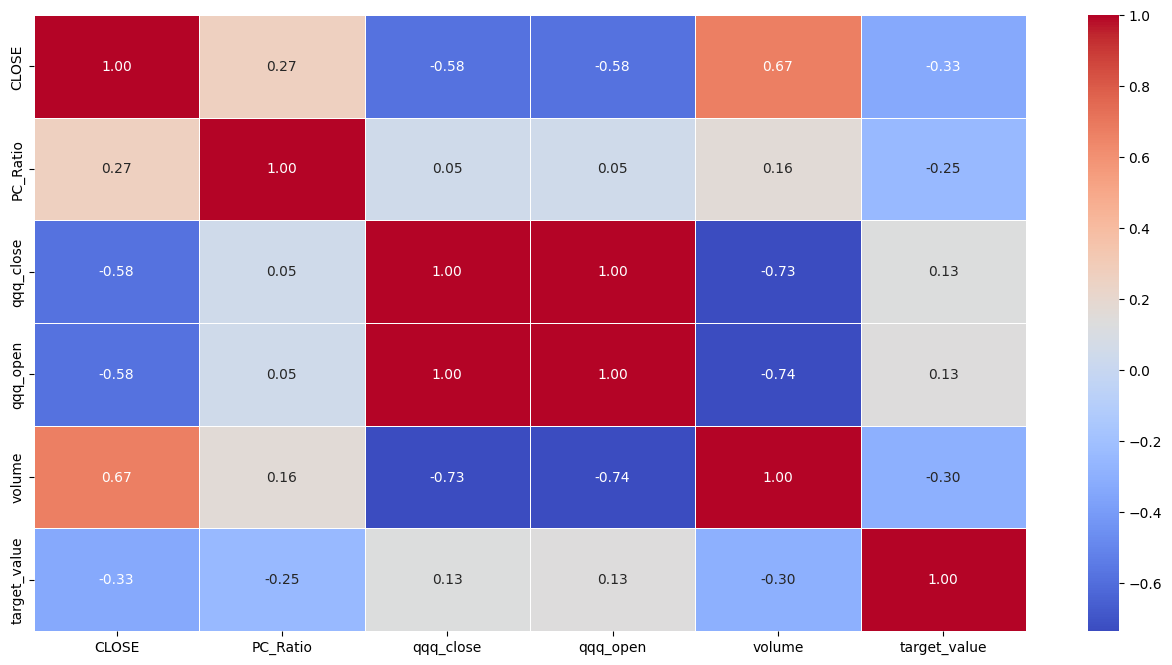

In [18]:
# Let's also draw a heatmap visualization of the correlation matrix
corr_matrix = df_transform.corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [20]:

df_transform = df_transform[20:]


In [21]:
# fill the 1st row with NA data
#df_transform = df_transform.iloc[1:]
#df_transform.fillna(method='bfill', inplace=True)
#df_transform=df_transform.drop(["prehigh","prelow", "target_short", "tartget_long"], axis=1)
#df_transform=df_transform.drop(["target_value","target_short", "predv","preclose"],axis=1)
#df_transform=df_transform[150:]
#df_transform.rename(columns={'target_long': 'target_value'}, inplace=True)


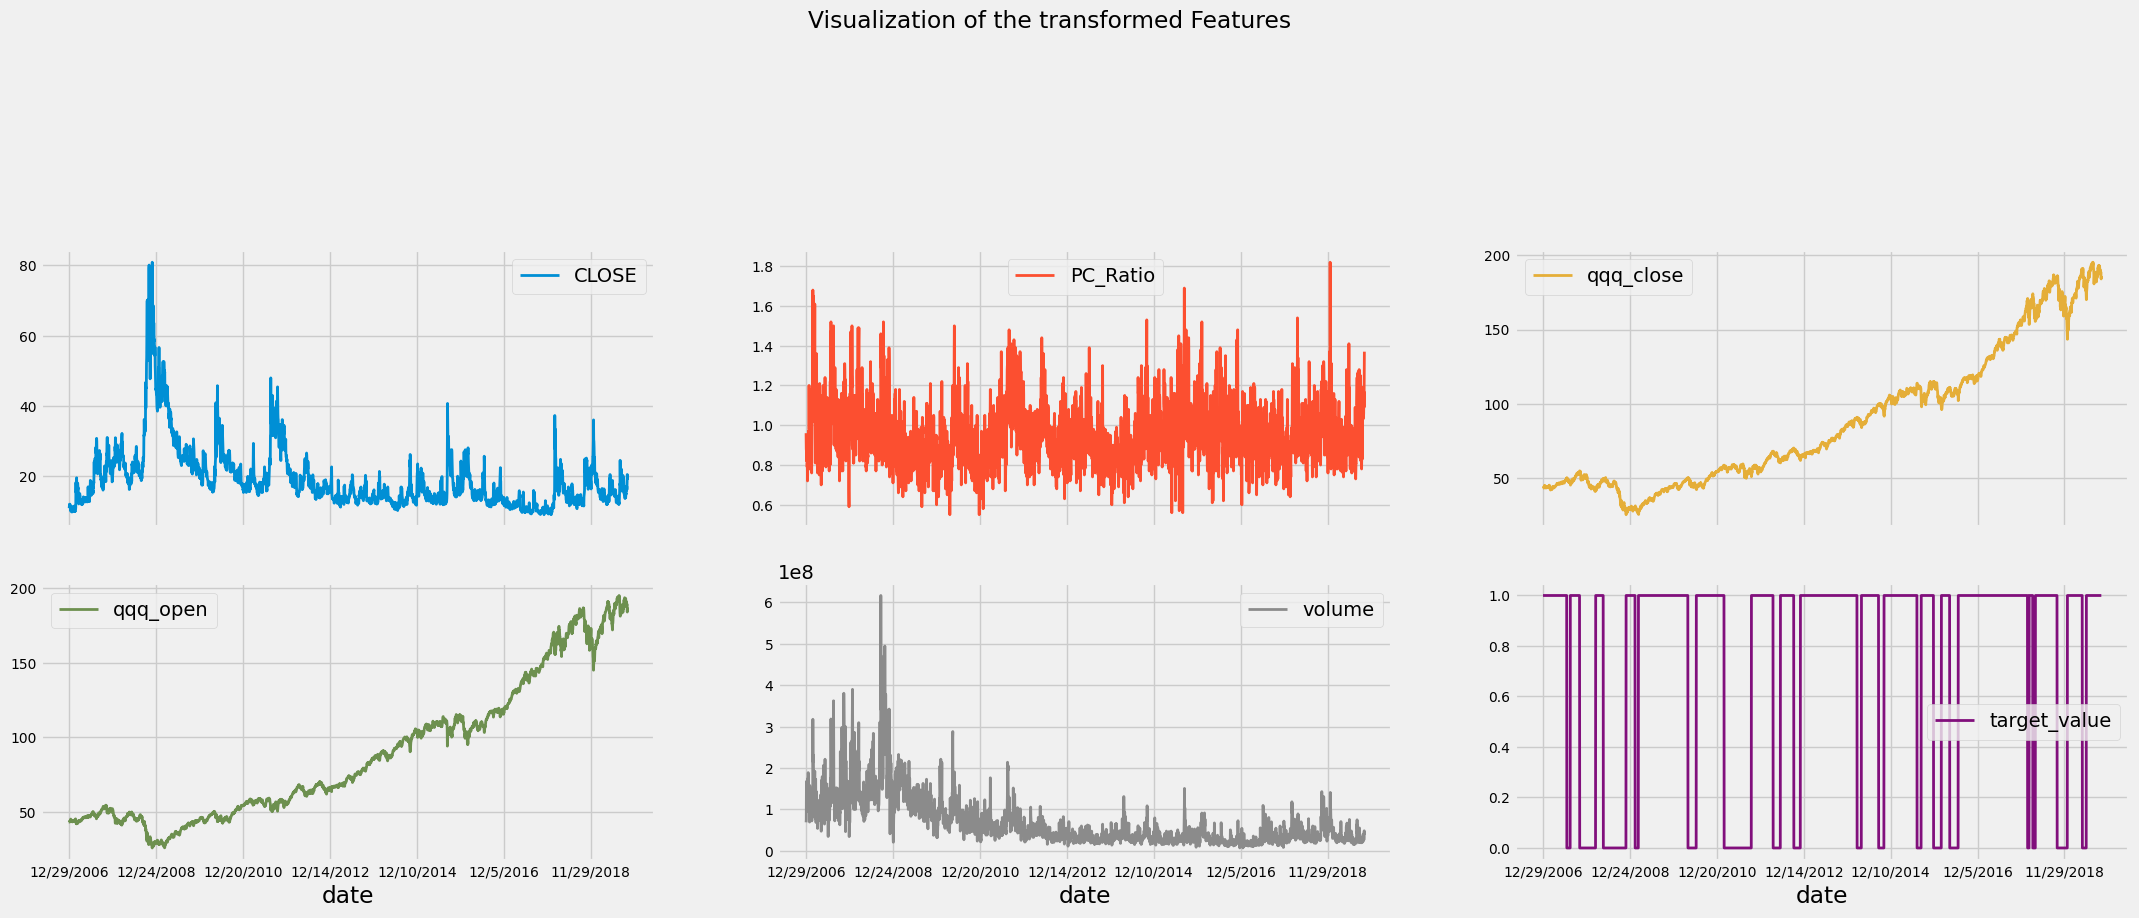

In [22]:
# Plot the transformed time series
plt.style.use('fivethirtyeight')
df_transform.plot(subplots=True,
                  layout=(6, 3),
                  figsize=(24,24),
                  fontsize=10, 
                  linewidth=2, 
                  title='Visualization of the transformed Features')
plt.show()

In [23]:
# Split train and test data
split = int(df_transform.target_value.count()*.8)
train_features = df_transform.iloc[:split]
train_labels = df_transform.iloc[:split].target_value

test_features = df_transform.iloc[split:] # 1182
test_labels = df_transform.iloc[split:].target_value # 1173

# I want to use a T-days window of input data for predicting target_class
# It means I need to prepend (T-1) last train records to the 1st test window
T = 10  # the timesteps window

prepend_features = train_features.iloc[-(T-1):] # last 10 of train
test_features = pd.concat([prepend_features, test_features], axis=0)

train_features.shape, train_labels.shape, test_features.shape, test_labels.shape
#prepend_features

((2570, 6), (2570,), (652, 6), (643,))

In [24]:
int(df_transform.target_value.count()*.8)

2570

In [30]:
# Rescale the features
# !pip install scikit-learn
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler() #MinMaxScaler(feature_range=(0,1000))  # MinMaxScaler(feature_range=(-1,1))
scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                     index=train_features.index,
                                     columns=train_features.columns)
# The Scaler is fit on the training set and then applied to the test set
scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                    index=test_features.index,
                                    columns=test_features.columns)

scaled_train_features.shape, scaled_test_features.shape
#scaled_test_features
scaled_train_features = scaled_train_features.drop('target_value', axis=1)
scaled_test_features = scaled_test_features.drop('target_value', axis=1)
#scaled_test_features

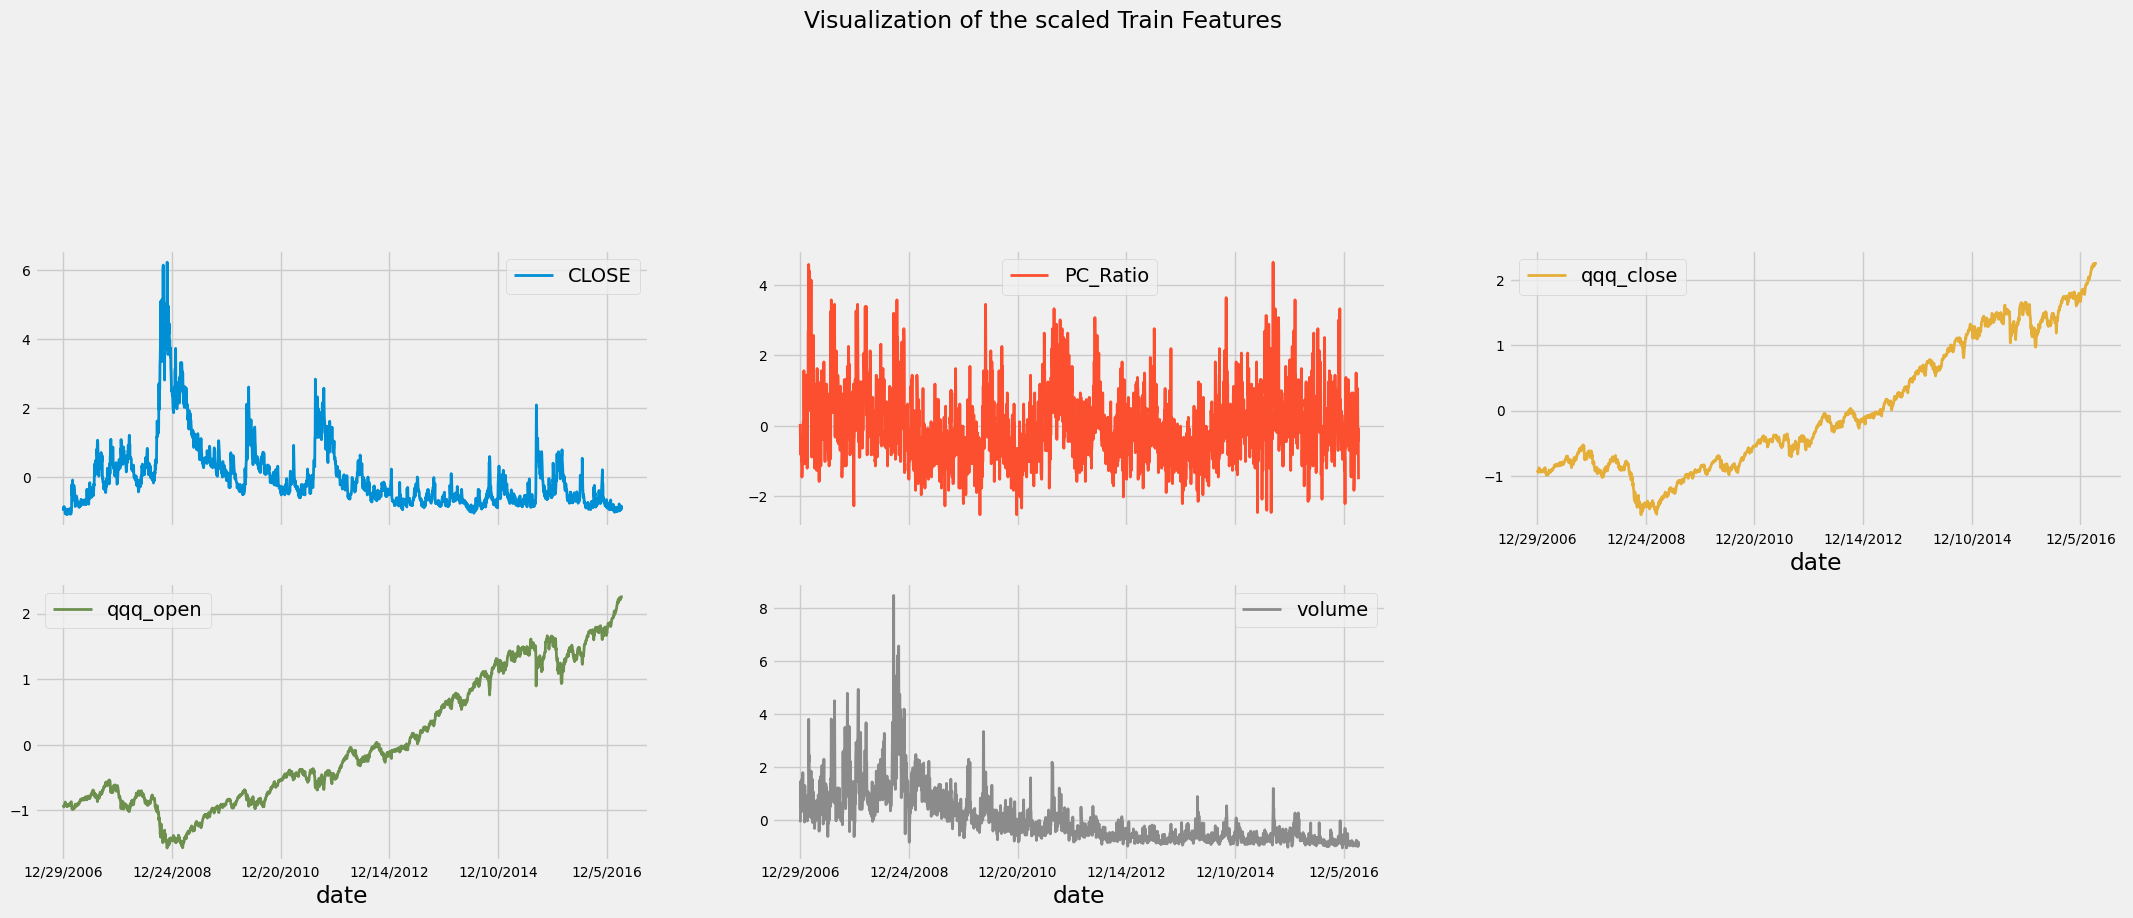

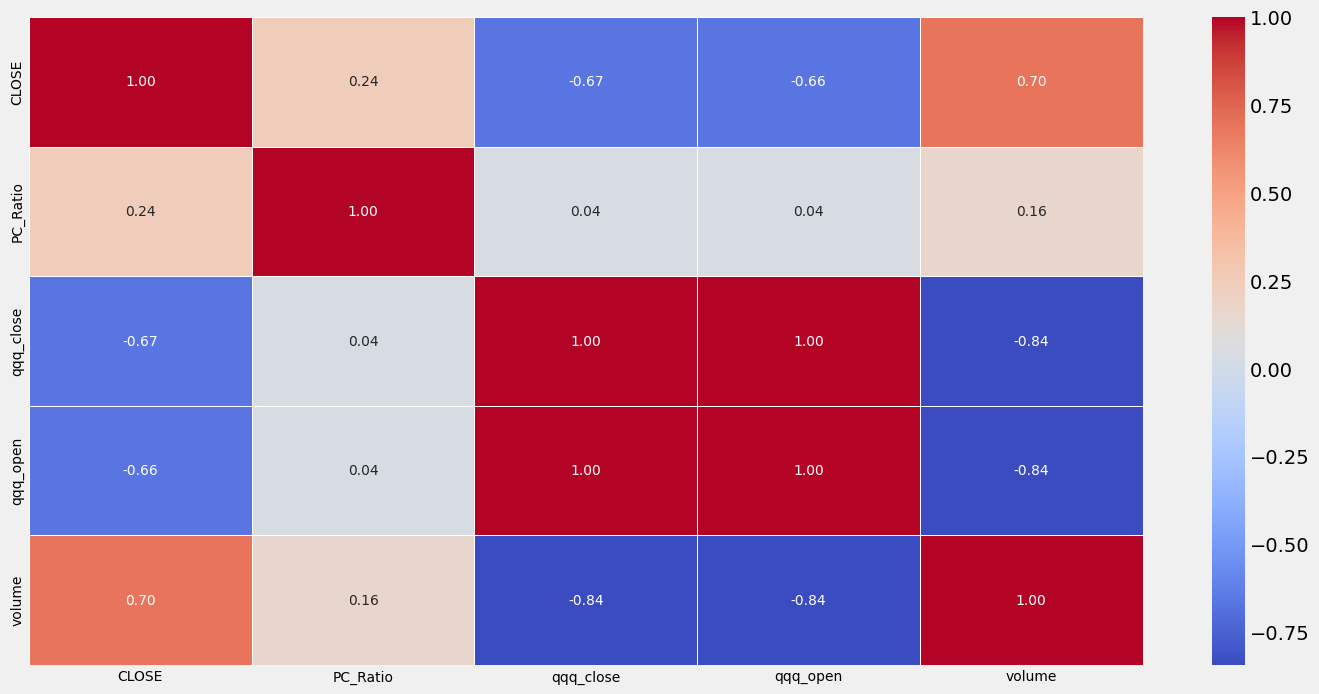

In [31]:
# Plot the rescaled_train_features
plt.style.use('fivethirtyeight')
scaled_train_features.plot(subplots=True,
                           layout=(6, 3),
                           figsize=(24,24),
                           fontsize=10, 
                           linewidth=2, 
                           title='Visualization of the scaled Train Features')
plt.show()

# Let's also draw a heatmap visualization of the correlation matrix
corr_matrix = scaled_train_features.corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [32]:
# Create sequences of T timesteps

X_train, y_train = [], []
for i in range(train_labels.shape[0] - (T-1)):
    X_train.append(scaled_train_features.iloc[i:i+T].values) # 
    y_train.append(train_labels.iloc[i + (T-1)])
#print(scaled_train_features.iloc[i:i+T].values)
#print(train_labels.iloc[i + (T-1)])
X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

X_test, y_test = [], []
for i in range(test_labels.shape[0]):
    X_test.append(scaled_test_features.iloc[i:i+T].values)
    y_test.append(test_labels.iloc[i])
X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)

#print(scaled_test_features.iloc[i:i+T].values)
#print(test_labels.iloc[i])

print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')

Train data dimensions: (2561, 10, 5), (2561, 1)
Test data dimensions: (643, 10, 5), (643, 1)


In [34]:
#scaled_train_features[scaled_train_features.predv > 4]

In [35]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.regularizers import l2
from time import time
#import random
#import numpy
#import tensorflow as tf
#random.seed(42)
#numpy.random.seed(42)
#tf.random.set_seed(42)
#from tensorflow import set_random_seed
#set_random_seed(42)


layers=[6, 6, 6, 6, 1], train_examples(M_TRAIN)=2561, test_examples(M_TEST)=643
batch(M_TRAIN) = 2561, timesteps(T) = 10, features(N) = 5, epochs = 1200
lr = 0.018, lambda = 0.03, dropout = 0.0, recurr_dropout = 0.0


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 10, 6)               │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 10, 6)               │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 10, 6)               │             312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 10, 6)               │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 6)                   │             312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 6)                   │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991 (3.87 KB)

 Trainable params: 955 (3.73 KB)

 Non-trainable params: 36 (144.00 B)

None
Epoch 262: early stopping
Restoring model weights from the end of the best epoch: 261.
-----------------------------------------------------------------
Training was completed in 12.84 secs
-----------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7446 - loss: 1.7987
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8305 - loss: 0.8345
-----------------------------------------------------------------
train accuracy = 74.4631%
test accuracy = 83.0482%
test error = 109 out of 643 examples


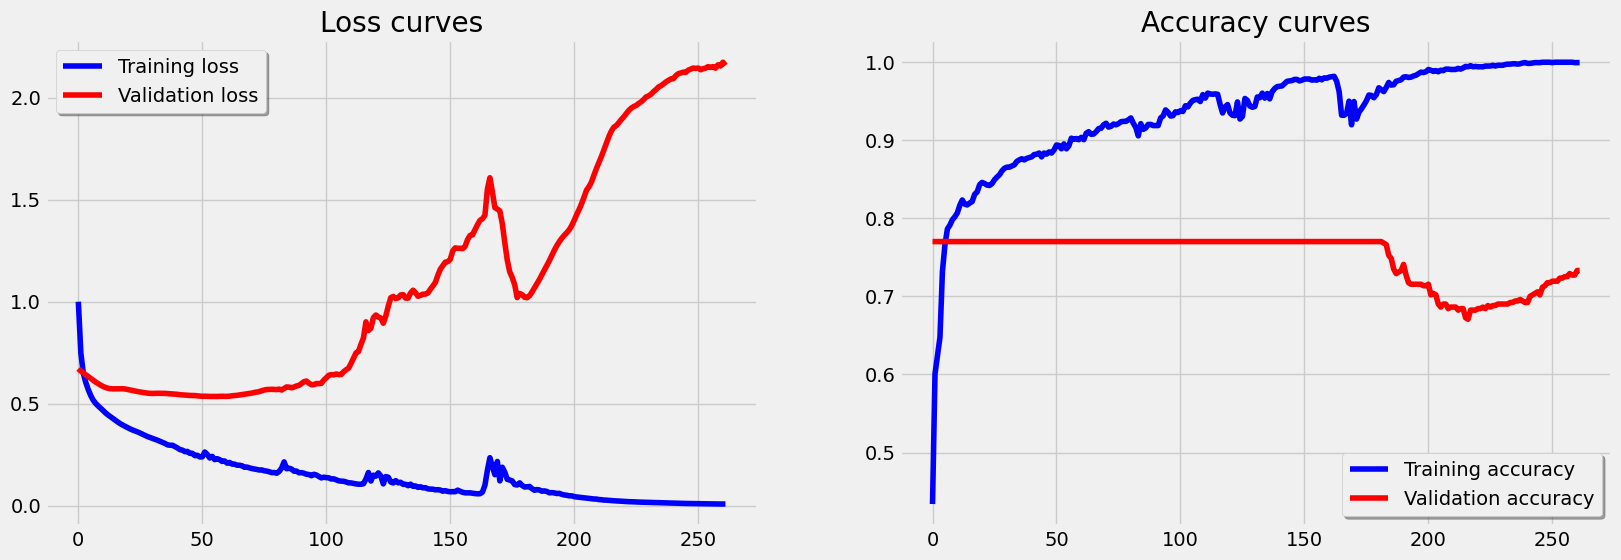

In [41]:
# Let's make a list of CONSTANTS for modelling:
nodes = 6 # 8
LAYERS = [nodes, nodes, nodes, nodes, 1]             # number of units in hidden and output layers
M_TRAIN = X_train.shape[0]           # number of training examples (2D)
M_TEST = X_test.shape[0]             # number of test examples (2D), full=X_test.shape[0]
N = X_train.shape[2]                 # number of features
BATCH = M_TRAIN                      # batch size
EPOCH = 1200                         # number of epochs
LR = 0.018 #0.018                           # learning rate of the gradient descent
LAMBD = 0.03                         # lambda in L2 regularizaion
DP = 0.0                             # dropout rate
RDP = 0.0                            # recurrent dropout rate
ractivation = "hard_sigmoid"         # hard_sigmoid

"""
For example, if you have 1,000,000 training samples and use a batch size of 100, 
one epoch corresponds to 10,000 steps (with 100 samples per step) 12.
"""

print(f'layers={LAYERS}, train_examples(M_TRAIN)={M_TRAIN}, test_examples(M_TEST)={M_TEST}')
print(f'batch(M_TRAIN) = {BATCH}, timesteps(T) = {T}, features(N) = {N}, epochs = {EPOCH}')
print(f'lr = {LR}, lambda = {LAMBD}, dropout = {DP}, recurr_dropout = {RDP}')

# Build the Model
model = Sequential()
model.add(LSTM(input_shape=(T, N), units=LAYERS[0],
               activation='tanh', recurrent_activation=ractivation,
               #kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))
# model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(units=LAYERS[1],
               activation='tanh', recurrent_activation=ractivation,
               #kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               #dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())

model.add(LSTM(units=LAYERS[2],
               activation='tanh', recurrent_activation=ractivation,
               return_sequences=False, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
"""
model.add(LSTM(units=LAYERS[3],
               activation='tanh', recurrent_activation=ractivation,
               #kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=False, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
"""
model.add(Dense(units=LAYERS[4], activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(loss='binary_crossentropy', #binary_crossentropy sparse_categorical_crossentropy, mean_squared_error mean_absolute_error
              metrics=['accuracy'], # metrics=[keras.metrics.BinaryAccuracy()]
              optimizer=Adam(learning_rate=LR)) # SGD(learning_rate=LR),  
print(model.summary())


# Define a learning rate decay method:
#lr_decay = ReduceLROnPlateau(monitor='loss', 
#                             patience=100, verbose=1, 
#                             factor=0.5, min_lr=0.000001)
# Define Early Stopping:
early_stop = EarlyStopping(monitor='loss', min_delta=0, 
                           patience=200, verbose=1, mode='min',
                           baseline=0, restore_best_weights=True)

# Train the model. 
# The dataset is small for NN - let's use test_data for validation

model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

start = time()

"""
History = model.fit(X_train, y_train,
                    epochs=EPOCH,
                    batch_size=BATCH,
                    validation_split=0.2,
                    #validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                    shuffle=True,verbose=0,
                    callbacks=[lr_decay, early_stop])
"""
History = model.fit(x=X_train, y=y_train,
          epochs=EPOCH,
          batch_size=BATCH,
          validation_split=0.2,  # Example: 20% split for validation
          shuffle=False,
          verbose=0,
          callbacks=[early_stop, model_checkpoint]) #lr_decay,

print('-'*65)
print(f'Training was completed in {time() - start:.2f} secs')
print('-'*65)

# Evaluate the model:
train_loss, train_acc = model.evaluate(X_train, y_train, batch_size=M_TRAIN, verbose=1)
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=M_TEST, verbose=1)

print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')
#print(f'train loss = {round(train_loss * 100, 4)}%')
#print(f'test loss = {round(test_loss * 100, 4)}%')
print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(History.history['loss'], color='b', label='Training loss')
axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
#axs[2].plot(History.history['learning_rate'], color='g', label='Training accuracy')
#axs[2].set_title("learning curves")
#axs[2].legend(loc='best', shadow=True)
plt.show()

In [190]:
# have fun